# Online Portfolio Selection: Mean Reversion

In this notebook, we will walk through the mean reversion strategies implemented in the online portfolio selection module.

**1. Anti-Correlation: TBD**

**2. Passive Aggressive Mean Reversion**
- PAMR
- PAMR-1
- PAMR-

**3. Confidence Weighted Mean Reversion: TBD**

**4. Online Moving Average Reversion**
- MAR-1
- MAR-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection import *



Support us on Patreon: https://www.patreon.com/HudsonThames

MlFinLab needs you! We need your help for us to keep on maintaining and implementing academic research based on 
financial machine learning (for open-source). In order for us to continue we need to raise $4000 of monthly donations
via Patreon - by December 2020. If we can't reach our goal, we will need to adopt more of a paid for service. We thought
that the best and least impactful course of action (should we not reach our goal) is to leave the package as open-source
but to make the documentation (ReadTheDocs) a paid for service. This is the ultimate litmus test, if the package is a 
value add, then we need the community to help us keep it going.

Our road map for 2020 is to implement the text book: Machine Learning for Asset Managers by Marcos Lopez de Prado, 
as well as a few papers from the Journal of Financial Data Science. We are hiring a full time developer for 3 months 
to help us reach our goals. The money that you

## Import Data

We will use the ETF data included in the mlfinlab library for analysis. This includes 23 ETF's with closing prices from 2008 to 2016

In [2]:
stock_prices = pd.read_csv('../tests/test_data/stock_prices.csv', parse_dates=True, index_col='Date')
stock_prices = stock_prices.dropna(axis=1)

In [3]:
stock_prices.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998


## Mean Reversion

Mean reversion strategies are implemented with the belief that an asset will revert back to its original price. If the asset's price has been increasing, it is more likely that it will decrease again and vice versa.

In a way, our original CRP strategy is a passive mean reversion strategy, because the portfolio weights continue to shift the better performing assets to the less performing ones.

## 1. Anti-Correlation: TBD

Anti-Correlation strategies 

$TBD$

## 2. Passive Aggressive Mean Reversion

Instead of traditional mean reversion, Passive Aggressive Mean Reversion strategy implements both the passive and aggressive side to mitigate the risks. On the short horizon, mean reversion is an effective technique in that assets that perform too well will revert back to its mean price, and assets that do not perform too well will increase at a sooner date.

However, some decreasing assets completely plummet. PAMR reduces the risks for assets that decrease too much and changes to a passive mean reversion portfolio. When the market is more stable, PAMR changes to a more active mean reversion to gather profit.

### Loss Function

$l_{\epsilon} (b; x_t) = 0 \: \text{if} \: b \cdot x_t \leq \epsilon$

$l_{\epsilon} (b; x_t) = b \cdot x_t - \epsilon$ otherwise

$\epsilon$ is a sensitivity parameter for how to passive and aggressive mean reversion will be chosen.

### Optimization Solution

$b_{t+1} = b_t - \tau_t(x_t - \bar x_t\textbf{1})$

All the weights can be portrayed as the above equation with different values of $\tau_t$ for different methods.

$\bar x_t = \frac{x_t \cdot \textbf{1}}{m}$ represents the market returns of the previous time period

### 2.1 PAMR

$b_{t+1} = \underset{b \in \Delta_m}{\arg\min} \frac{1}{2} \|b-b_t \|^2$ such that $l_{\epsilon}(b;x_t)=0$

$\tau_t = \max \left\lbrace 0, \frac{b_t \cdot x_t - \epsilon}{ \| x_t - \bar x_t \textbf{1}\|^2}\right\rbrace$

This objective function minimizes the deviations from the previous portfolio weights to create the passive strategy of PAMR.

### 2.2 PAMR-1

$b_{t+1} = \underset{b \in \Delta_m}{\arg\min} \left\lbrace\frac{1}{2} \|b-b_t \|^2 + C\xi\right\rbrace$ such that $l_{\epsilon}(b;x_t) \leq \xi \geq 0$

$\tau_t = \max \left\lbrace 0, \min \left\lbrace C, \frac{b_t \cdot x_t - \epsilon}{ \| x_t - \bar x_t \textbf{1}\|^2}\right\rbrace \right\rbrace$

If the loss is non-zero, PAMR acts aggresively to achieve mean reversion profits.

$C$ is a parameter to influence the slack variable on the aggressiveness of the strategy.

### 2.3 PAMR-2

$b_{t+1} = \underset{b \in \Delta_m}{\arg\min} \left\lbrace\frac{1}{2} \|b-b_t \|^2 + C\xi^2 \right\rbrace$ such that $l_{\epsilon}(b;x_t) \leq \xi$

$\tau_t = \max \left\lbrace C, \frac{b_t \cdot x_t - \epsilon}{ \| x_t - \bar x_t \textbf{1}\|^2 + \frac{1}{2C}}\right\rbrace $

Similar to PAMR-1, PAMR-2 squares the $\xi$ term to constraint the problem as the variable scales quadratically.

Passive Aggressive Mean Reversion can be called with PAMR(), which takes in 3 parameters.

epsilon determines the sensitivity to market volatility

C determines the aggressiveness of switching to mean reversion strategy

optimization_method determines which PAMR variations we will be using

In [4]:
pamr = PAMR(epsilon=0.1, c=0.01, optimization_method=0)
pamr1 = PAMR(epsilon=0.1, c=0.01, optimization_method=1)
pamr2 = PAMR(epsilon=0.1, c=0.01, optimization_method=2)
pamr.allocate(stock_prices)
pamr1.allocate(stock_prices)
pamr2.allocate(stock_prices)

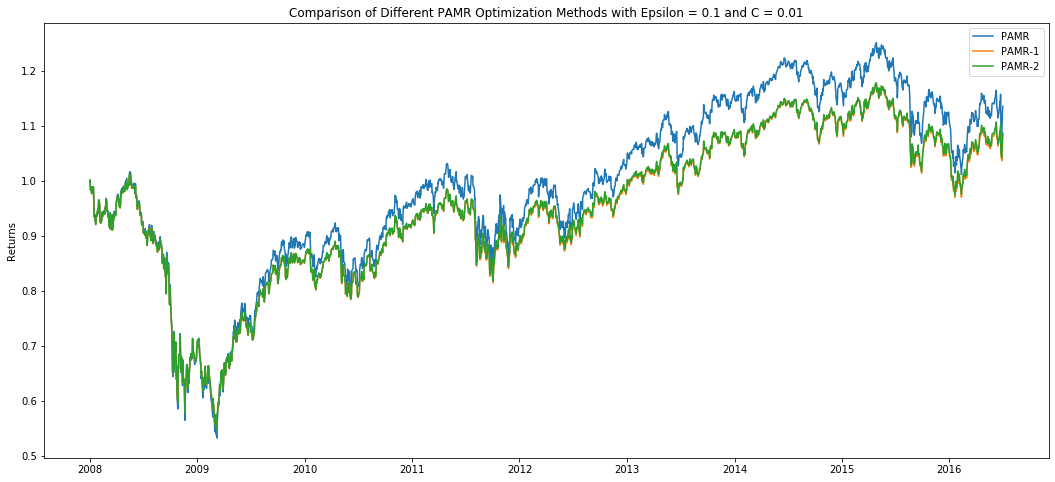

In [5]:
plt.figure(figsize=(18,8));
plt.plot(pamr.portfolio_return, label = 'PAMR');
plt.plot(pamr1.portfolio_return, label = 'PAMR-1');
plt.plot(pamr2.portfolio_return, label = 'PAMR-2');
plt.title('Comparison of Different PAMR Optimization Methods with Epsilon = 0.1 and C = 0.01')
plt.ylabel('Returns')
plt.legend();

From initial analysis involving epsilon of 0.1 and c of 0.01, there seems to be not too much of a different between all 3 methods. We will continue to look at different combinations of episilon and c to find a meaningful result.

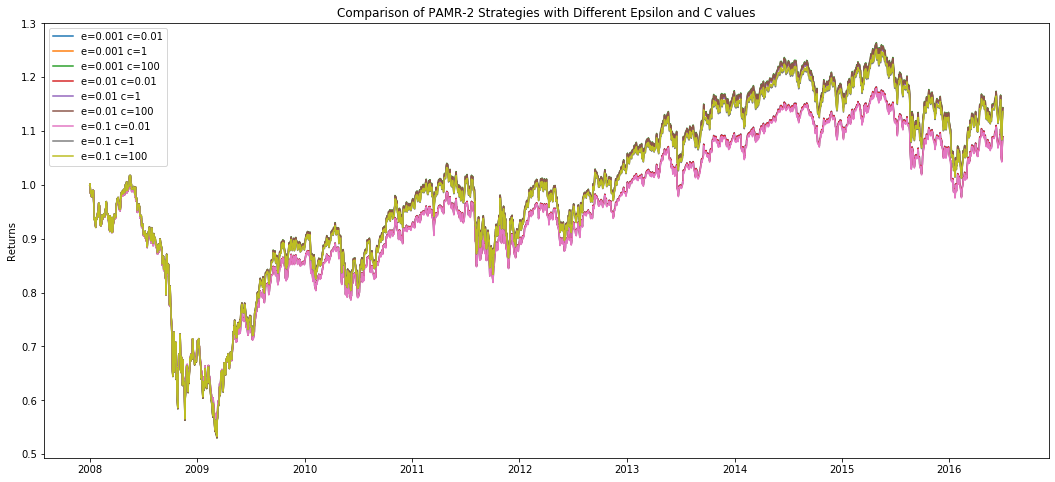

In [6]:
plt.figure(figsize=(18,8));
epsilon_values = [0.001,0.01,0.1]
c_values = [0.01,1,100]
for e in epsilon_values:
    for c in c_values:
        strat = PAMR(epsilon=e, c=c, optimization_method=2)
        strat.allocate(stock_prices)
        plt.plot(strat.portfolio_return, label = 'e=' + str(e) +' c=' + str(c));
plt.title('Comparison of PAMR-2 Strategies with Different Epsilon and C values')
plt.ylabel('Returns')
plt.legend();

From the above graph, we did not find too much insight from the different parameters. The strategy also fails to mitigate the risks formulated in 2008 and 2009.

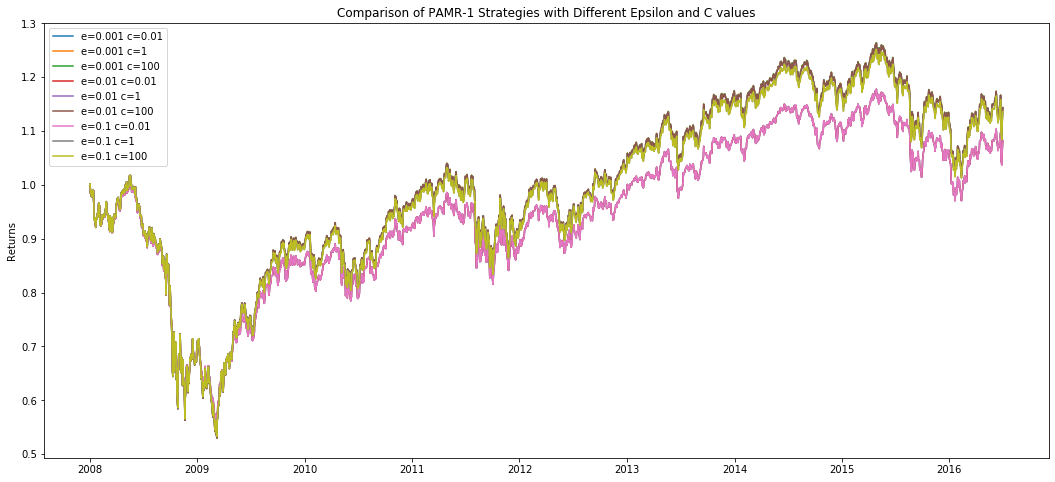

In [7]:
plt.figure(figsize=(18,8));
epsilon_values = [0.001,0.01,0.1]
c_values = [0.01,1,100]
for e in epsilon_values:
    for c in c_values:
        strat = PAMR(epsilon=e, c=c, optimization_method=1)
        strat.allocate(stock_prices)
        plt.plot(strat.portfolio_return, label = 'e=' + str(e) +' c=' + str(c));
plt.title('Comparison of PAMR-1 Strategies with Different Epsilon and C values')
plt.ylabel('Returns')
plt.legend();

PAMR-1 creates an almost identical map to that by PAMR-2. From the given graphs, we could not generate or visualize a strategy that was profitable. Fine tuning for specific periods might be needed in order to discover a strategy that works.

## 3. Confidence Weighted Mean Reversion: TBD

Confidence weighted mean reversion strategies

## 4. Online Moving Average Reversion

Online moving average reversion looks to exploit a multiperiod mean reversion. The underlying assumption of the strategy is that the price will revert back to its moving average. This can solve drawbacks of traditional mean reversion techniques that only look at one window back to determine the new weights.

OLMAR will employ SMA and EMA to look back into past prices and also employ passive aggressive strategies as well.

### Optimization Solutions

$b_{t+1} = b_t + \lambda_{t+1}(\tilde{x}_{t+1}-\bar x_{t+1}\textbf{1})$

All the new weights can be portrayed as the above equation

$\lambda_{t+1} = max \left\lbrace 0, \frac{\epsilon-b_t \cdot \tilde{x}_{t+1}}{\|\tilde{x}_{t+1}-\bar x_{t+1} \textbf{1}\|^2}\right\rbrace$

$\bar x_{t+1} = \frac{\tilde{x}_{t+1} \cdot \textbf{1}}{m}$ represents the average predicted returns

### MAR-1

$\tilde{x}_{t+1}(w) = \frac{SMA_t(w)}{p_t} = \frac{1}{w} \left(\frac{p_t}{p_t} + \frac{p_{t-1}}{p_t}+ \cdot \cdot \cdot + \frac{p_{t-w+1}}{p_t}\right) = \frac{1}{w} \left( 1+ \frac{1}{x_t}+ \cdot \cdot \cdot + \frac{1}{\odot^{w-2}_{i=0}x_{t-1}} \right)$

First method uses a simple moving average over a window

### MAR-2

$\tilde{x}_{t+1}(\alpha) = \frac{EMA_t(\alpha)}{p_t} = \frac{\alpha p_t+(1-\alpha)EMA_{t-1}(\alpha)}{p_t} = \alpha \textbf{1} + (1 - \alpha) \frac{EMA_{t-1}(\alpha)}{p_{t-1}}\frac{p_{t-1}}{p_t} = \alpha \textbf{1} + (1 - \alpha) \frac{\tilde{x_t}}{x_t}$

Second method uses an exponential moving average with $\alpha$ as the decaying factor

Using the corresponding $\tilde{x}$ for each MAR, new weights can be calculated with the optimization equation. The new weights can be out of range of the original simplex domain, so we will then readjust to fit our constraints.

In [8]:
olmar1 = OLMAR(reversion_method=1, epsilon=0.5, window=2)
olmar2 = OLMAR(reversion_method=2, epsilon=0.5, alpha=0.5)
olmar1.allocate(stock_prices)
olmar2.allocate(stock_prices)

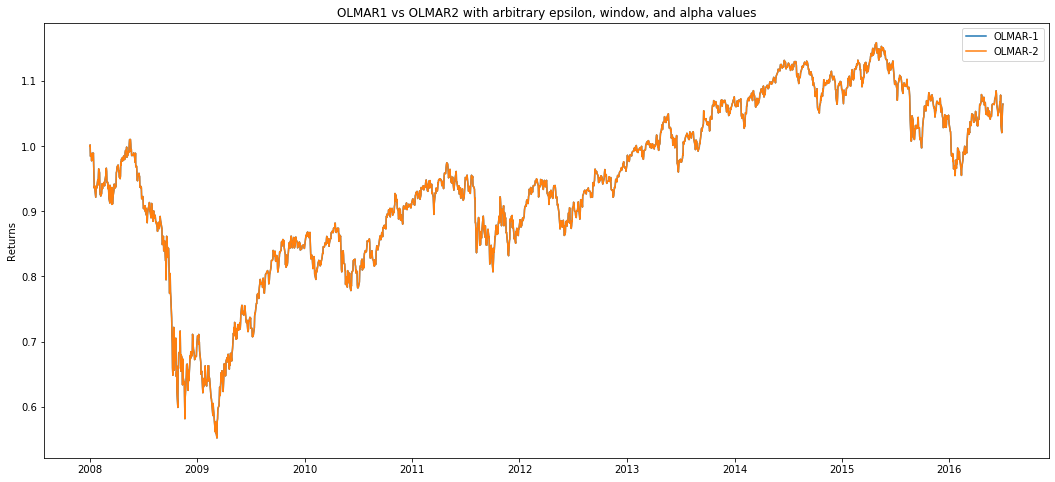

In [10]:
plt.figure(figsize=(18,8));
plt.plot(olmar1.portfolio_return, label = 'OLMAR-1');
plt.plot(olmar2.portfolio_return, label = 'OLMAR-2');
plt.title('OLMAR1 vs OLMAR2 with arbitrary epsilon, window, and alpha values')
plt.ylabel('Returns')
plt.legend();

Initial analysis indicates no significant results for OLMAR method

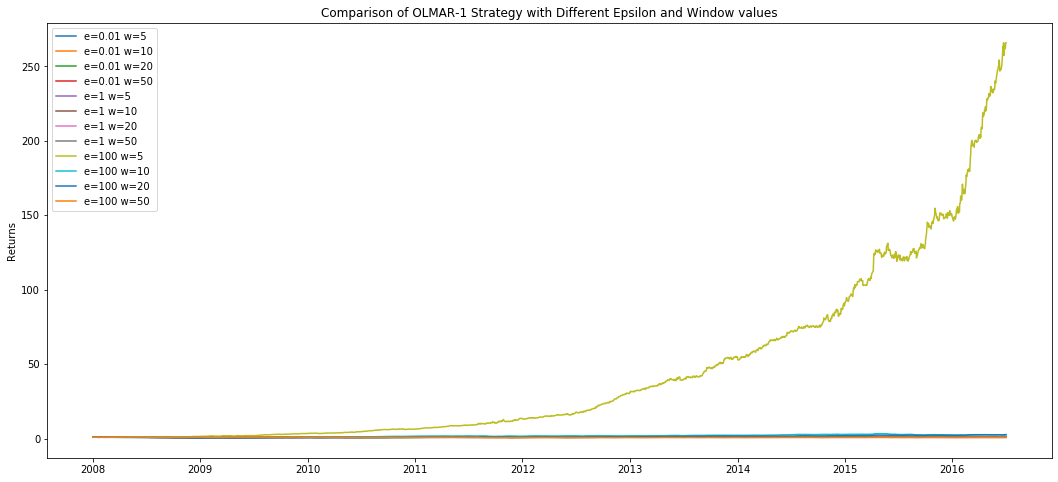

In [4]:
plt.figure(figsize=(18,8));
epsilon_values = [0.01,1,100]
window_values = [5,10,20,50]
for e in epsilon_values:
    for w in window_values:
        strat = OLMAR(reversion_method=1, epsilon=e, window=w)
        strat.allocate(stock_prices)
        plt.plot(strat.portfolio_return, label = 'e='+str(e)+' w='+str(w));
plt.title('Comparison of OLMAR-1 Strategy with Different Epsilon and Window values')
plt.ylabel('Returns')
plt.legend();

This is a crazy example that came out of no where, but a window of 5 and epsilon of 100 had a return of 258 over the last 8 years. That means that if you invested 100 dollars that would now be 25800 dollars just from this portfolio. It seems a bit hard to believe and is most likely a result from the fact that we are hyperparameter tuning. More investigation is needed to confirm this.


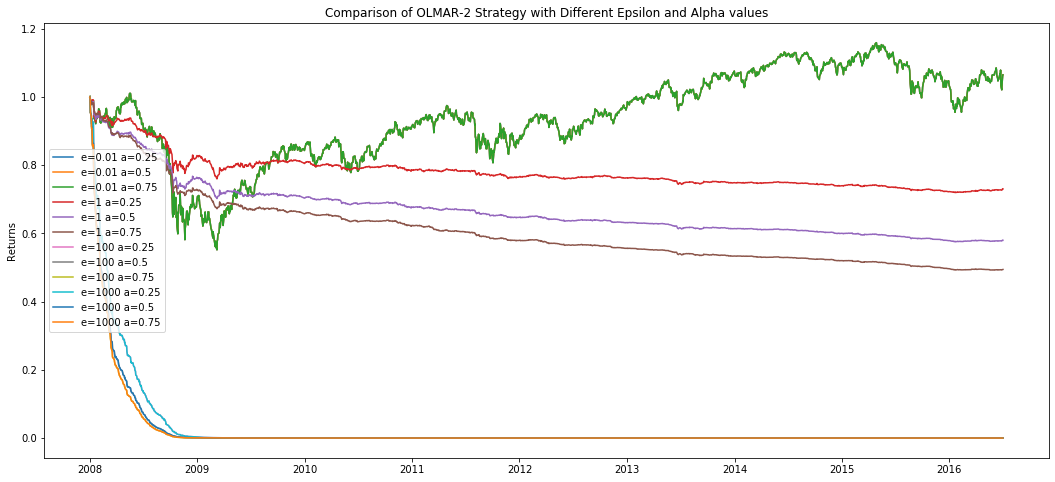

In [5]:
plt.figure(figsize=(18,8));
epsilon_values = [0.01,1,100,1000]
alpha_values = [0.25,0.5,0.75]
for e in epsilon_values:
    for a in alpha_values:
        strat = OLMAR(reversion_method=2, epsilon=e, alpha=a)
        strat.allocate(stock_prices)
        plt.plot(strat.portfolio_return, label = 'e='+str(e)+' a='+str(a));
plt.title('Comparison of OLMAR-2 Strategy with Different Epsilon and Alpha values')
plt.ylabel('Returns')
plt.legend();

For the given epsilon and alpha values OLMAR-2 did not perform as well as the previous parameter. Different sets of parameter tuning is needed to evaluate the portfolio strengths.